# Assessing the Change in Accuracy with Number of Points
Written in Python 2

In [30]:
# This notebook was built in Catherine's vectorenv
import pandas as pd
from pandas import DataFrame
import numpy as np
import os
import glob
import datetime
#import pylabb
import matplotlib as plt
import datetime as datetime  
import statsmodels.api as sm  
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('ggplot')

In [31]:
%matplotlib inline

In [32]:
path =r'/Users/ckuhn/Documents/Coauthor/DFO_Accuracy/student_data' # use your path
allFiles = glob.glob(path + "/*.csv")
df = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
df = pd.concat(list_)
len(df['dfoID'].unique())

37

In [33]:
df['dfoID'].unique()

array([4171, 2143, 4427, 2024, 3657, 2948, 2045, 2366, 4315, 2543, 2586,
       2180, 2119, 2780, 2473, 2940, 2947, 2395, 2261, 3667, 3871, 2303,
       2584, 4516, 4163, 4241, 2829, 3916, 4435, 3850, 3070, 3754, 3267,
       2104, 4226, 4507, 3218])

In [34]:
df = df.drop(['system:index','.geo'], axis=1)

In [35]:
df.groupby(['strata'])['dfoID'].count()
# strata = 0 = dry, 1 = permanent water, 2 = flood

strata
0    5680
1    2999
2    8820
4    5616
Name: dfoID, dtype: int64

In [36]:
df.groupby(['validation'])['dfoID'].count()

validation
-99.0      527
 0.0      8546
 1.0     13864
 99.0      157
Name: dfoID, dtype: int64

In [37]:
df = df.loc[df['validation']> -1]
df = df.loc[df['validation']<99]

In [38]:
len(df['dfoID'].unique())

37

In [46]:
%cd '/Users/ckuhn/Documents/Coauthor/DFO_Accuracy/student_data'
df.to_csv('all_student_data.csv', encoding='utf-8')

/Users/ckuhn/Documents/Coauthor/DFO_Accuracy/student_data


In [39]:
df.head(1)

,B1,B2,B3,B4,B5,B7,MNDWI,NDVI,Unnamed: 0,analyst,date,dfoID,id,lat,lon,random,strata,test,validation
0,485.691006,803.182372,565.610152,3746.204332,1972.739219,835.617489,-0.645385,0.733068,NaN,HT,06/11/2018,4171,0,28.282388,80.833626,0.875922,0,NaN,0.0


In [40]:
df.columns

Index(['B1', 'B2', 'B3', 'B4', 'B5', 'B7', 'MNDWI', 'NDVI', 'Unnamed: 0',
       'analyst', 'date', 'dfoID', 'id', 'lat', 'lon', 'random', 'strata',
       'test', 'validation'],
      dtype='object')

In [41]:
df['strata'] = df['strata'].multiply(2)

In [42]:
df['strata'].value_counts()

4    8460
8    5616
0    5490
2    2844
Name: strata, dtype: int64

In [43]:
df['validation'].value_counts()

1.0    13864
0.0     8546
Name: validation, dtype: int64

In [44]:
df['score']  = df['strata'] + df['validation'] 

In [45]:
df['score'].value_counts()

5.0    6851
0.0    5328
9.0    4321
3.0    2530
4.0    1609
8.0    1295
2.0     314
1.0     162
Name: score, dtype: int64

In [25]:
y_act = df['strata'].multiply(2)
y_pred = df['validation'] 
df_confusion = pd.crosstab(y_act, y_pred)
df_confusion

validation,0.0,1.0
strata,,
0,2664,81
4,314,2530
8,1295,4321


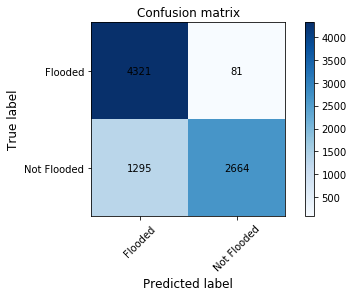

In [26]:
#Validation (1) + Strata (4)
tp = len(df.loc[df['test']== 5])
#Validation (0) + Strata (0)
tn = len(df.loc[df['test']== 0])
#Validation (0) + Strata (4)
fp = len(df.loc[df['test']== 4])
#Validation (1) + Strata (0)
fn = len(df.loc[df['test']== 1])


import numpy as np
from matplotlib import pyplot as plt

def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()

    width, height = cm.shape

    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label',  fontsize=12)

    tp,
cm = np.array([[tp, fn],[fp, tn]])
plot_confusion_matrix(cm, ['Flooded', 'Not Flooded'])


# Metrics By Each Event

In [27]:
raw = df

In [28]:
raw
df0 = raw

In [38]:
# Loop through the df and select each unique flood id
# for each flood id, calcluate the following variables 
# append the variables to a list 
# index the list by the original flood id

In [39]:
## List of things to get put into a new dictionary or dataframe whatever you call it

## Here is me filtering to one flood id, needs to loop through all of them

df = raw.loc[raw['dfoID']== 2584]


# Stuff to calculate and append
#Validation (1) + Strata (4)
tp = len(df.loc[df['test']== 5])
#Validation (0) + Strata (0)
tn = len(df.loc[df['test']== 0])
#Validation (0) + Strata (4)
fp = len(df.loc[df['test']== 4])
#Validation (1) + Strata (0)
fn = len(df.loc[df['test']== 1])

dfoID1 = df['dfoID'].mean()
prec1  = tp / (tp + fp) # Likelihood that pixel labeled flooded was really flooded
recall1   = tp / (tp + fn)  # % of flooded pixels it ID'ed correctly
acc1 = (tn + tp) / (tn+tp+fp+fn)
print(dfoID1, tn, tp, fn,fp)

2584.0 210 294 0 154


In [40]:
df = raw.loc[raw['dfoID']== 2045]

#Validation (1) + Strata (4)
tp2 = len(df.loc[df['test']== 5])

#Validation (0) + Strata (0)
tn2 = len(df.loc[df['test']== 0])

#Validation (0) + Strata (4)
fp2 = len(df.loc[df['test']== 4])

#Validation (1) + Strata (0)
fn2 = len(df.loc[df['test']== 1])

# 3 = STudents labeled it as water (1), it is permanent water (2)
# 2 = DFO labeled it as permanent water (2), students said it wasn't water (0)

dfoID2 = df['dfoID'].mean()
prec2  = tp / (tp + fp) # Likelihood that pixel labeled flooded was really flooded
recall2   = tp / (tp + fn)  # % of flooded pixels it ID'ed correctly
acc2 = (tn + tp) / (tn+tp+fp+fn)
print(tn2, tp, fn,fp, acc2)

326 294 0 154 0.7659574468085106


In [41]:
df = raw.loc[raw['dfoID']== 2180]
#Validation (1) + Strata (4)
tp = len(df.loc[df['test']== 5])
#Validation (0) + Strata (0)
tn = len(df.loc[df['test']== 0])
#Validation (0) + Strata (4)
fp = len(df.loc[df['test']== 4])
#Validation (1) + Strata (0)
fn = len(df.loc[df['test']== 1])

# 3 = STudents labeled it as water (1), it is permanent water (2)
# 2 = DFO labeled it as permanent water (2), students said it wasn't water (0)

dfoID3 = df['dfoID'].mean()
prec3  = tp / (tp + fp) # Likelihood that pixel labeled flooded was really flooded
recall3   = tp / (tp + fn)  # % of flooded pixels it ID'ed correctly
acc3 = (tn + tp) / (tn+tp+fp+fn)

print(tn, tp, fn,fp)

230 462 12 26


In [42]:
print('dfoID', dfoID1)
print('precision', prec1)
print('recall', recall2)
print('overall_accuracy', acc2)

dfoID 2584.0
precision 0.65625
recall 1.0
overall_accuracy 0.7659574468085106


In [43]:
d = {'dfoID': [dfoID1, dfoID2,dfoID3], 
     'precision': [prec1,prec2,prec3], 
     'recall': [recall1,recall2,recall3], 
     'overall_accuracy': [acc1, acc2, acc3]}
df = pd.DataFrame(data=d)

In [44]:
df

,dfoID,overall_accuracy,precision,recall
0,2584.0,0.765957,0.656250,1.000000
1,2045.0,0.765957,0.656250,1.000000
2,2180.0,0.947945,0.946721,0.974684


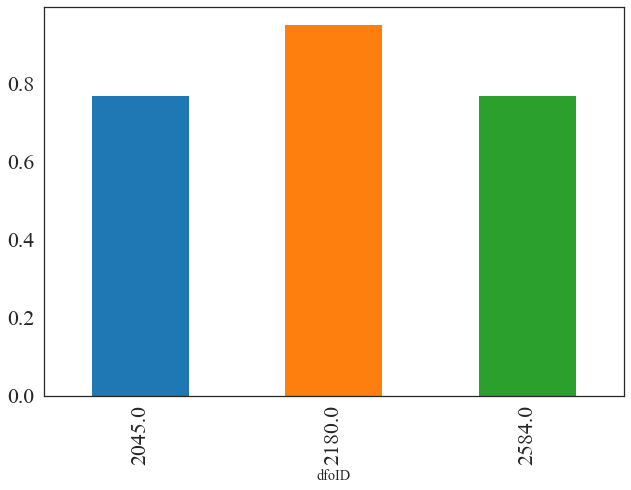

In [45]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-talk'])
    plt.rc("font", family="Times New Roman", size = 22)
    plt.rc('xtick', labelsize=22) 
    plt.rc('ytick', labelsize=22) 
set_style()  


df.groupby(['dfoID'])['overall_accuracy'].mean().plot(kind='bar')

function psuedocode

loop over every ID in the DFO
compute these metrics
add them to a new dataframe that is indexed by the flood ID

## Changing number of sampling points

In [46]:
df = raw.loc[raw['dfoID']== 2584]
df['random'].describe()

count    860.000000
mean       0.490387
std        0.292219
min        0.000418
25%        0.223711
50%        0.473267
75%        0.742068
max        0.997946
Name: random, dtype: float64

In [49]:
y_act = df['strata'] 
y_pred = df['validation'] 
df_confusion = pd.crosstab(y_act, y_pred)
df_confusion

validation,0.0,1.0
strata,,
0.0,210,0
2.0,36,166
4.0,154,294


In [50]:
teeny = df.sort_values('random',ascending = False).head(10)
print(len(teeny))
small = df.sort_values('random',ascending = False).head(50)
len(small)
medium = df.sort_values('random',ascending = False).head(100)
len(medium)
large = df.sort_values('random',ascending = False).head(200)
len(large)
xlarge = df.sort_values('random',ascending = False)
len(xlarge)

10


860

In [51]:
df = teeny

# True positives = they were both labeled flood
#Validation (1) + Strata (4)
tp0 = len(df.loc[df['test']== 5])

# True negative = they were both labeled dry
#Validation (0) + Strata (0)
tn0 = len(df.loc[df['test']== 0])

#Validation (0) + Strata (4)
fp0 = len(df.loc[df['test']== 4])

#Validation (1) + Strata (0)
fn0 = len(df.loc[df['test']== 1])

# 3 = STudents labeled it as water (1), it is permanent water (2)
# 2 = DFO labeled it as permanent water (2), students said it wasn't water (0)

dfoID0 = 10
prec0  = tp0 / (tp0 + fp0) # Likelihood that pixel labeled flooded was really flooded
recall0   = tp0 / (tp0 + fn0)  # % of flooded pixels it ID'ed correctly
acc0 = (tn0 + tp0) / (tn0+tp0+fp0+fn0)

prod_om_error0 = tp0 / (tp0 + fn0)  #  modeled positives over all true positives
cons_com_error0 = tp0 / (tp0 + fp0) #  true modeled positives over all modeled positives

tp0 , tn0, fp0, fn0

(4, 2, 4, 0)

In [52]:
df = small 

#Validation (1) + Strata (4)
tp1 = len(df.loc[df['test']== 5])

#Validation (0) + Strata (0)
tn1 = len(df.loc[df['test']== 0])

#Validation (0) + Strata (4)
fp1 = len(df.loc[df['test']== 4])

#Validation (1) + Strata (0)
fn1 = len(df.loc[df['test']== 1])

prod_om_error1 = tp1 / (tp1 + fn1) 
cons_com_error1 = tp1 / (tp1 + fp1) 

# 3 = STudents labeled it as water (1), it is permanent water (2)
# 2 = DFO labeled it as permanent water (2), students said it wasn't water (0)

dfoID1 = 50
prec1  = tp1 / (tp1 + fp1) # Likelihood that pixel labeled flooded was really flooded
recall1   = tp1 / (tp1 + fn1)  # % of flooded pixels it ID'ed correctly
acc1 = (tn1 + tp1) / (tn1+tp1+fp1+fn1)

In [53]:
df = medium


#Validation (1) + Strata (4)
tp2 = len(df.loc[df['test']== 5])

#Validation (0) + Strata (0)
tn2 = len(df.loc[df['test']== 0])

#Validation (0) + Strata (4)
fp2 = len(df.loc[df['test']== 4])

#Validation (1) + Strata (0)
fn2 = len(df.loc[df['test']== 1])

# 3 = STudents labeled it as water (1), it is permanent water (2)
# 2 = DFO labeled it as permanent water (2), students said it wasn't water (0)

dfoID2 = 100
prec2  = tp2 / (tp2 + fp2) # Likelihood that pixel labeled flooded was really flooded
recall2   = tp2 / (tp2 + fn2)  # % of flooded pixels it ID'ed correctly
acc2 = (tn2 + tp2) / (tn2+tp2+fp2+fn2)

prod_om_error2 = tp2 / (tp2 + fn2) 
cons_com_error2 = tp2 / (tp2 + fp2) 

In [54]:
df = large

#Validation (1) + Strata (4)
tp3 = len(df.loc[df['test']== 5])
#Validation (0) + Strata (0)
tn3 = len(df.loc[df['test']== 0])
#Validation (0) + Strata (4)
fp3 = len(df.loc[df['test']== 4])
#Validation (1) + Strata (0)
fn3 = len(df.loc[df['test']== 1])

# 3 = STudents labeled it as water (1), it is permanent water (2)
# 2 = DFO labeled it as permanent water (2), students said it wasn't water (0)

dfoID3 = 250
prec3  = tp3 / (tp3 + fp3) # Likelihood that pixel labeled flooded was really flooded
recall3   = tp3 / (tp3 + fn3)  # % of flooded pixels it ID'ed correctly
acc3 = (tn3 + tp3) / (tn3+tp3+fp3+fn3)

prod_om_error3 = tp3 / (tp3 + fn3) 
cons_com_error3 = tp3 / (tp3 + fp3) 

In [55]:
df = xlarge

#Validation (1) + Strata (4)
tp4 = len(df.loc[df['test']== 5])
#Validation (0) + Strata (0)
tn4 = len(df.loc[df['test']== 0])
#Validation (0) + Strata (4)
fp4 = len(df.loc[df['test']== 4])
#Validation (1) + Strata (0)
fn4 = len(df.loc[df['test']== 1])

# 3 = STudents labeled it as water (1), it is permanent water (2)
# 2 = DFO labeled it as permanent water (2), students said it wasn't water (0)

dfoID4 = 500
prec4  = tp4 / (tp4 + fp4) # Likelihood that pixel labeled flooded was really flooded
recall4   = tp4 / (tp4 + fn4)  # % of flooded pixels it ID'ed correctly
acc4 = (tn4 + tp4) / (tn4+tp4+fp4+fn4)
prod_om_error4 = tp4 / (tp4 + fn4) 
cons_com_error4 = tp4 / (tp4 + fp4) 


In [56]:
d = {'dfoID': [dfoID0, dfoID1, dfoID2,dfoID3, dfoID4], 
     'tp': [tp0, tp1,tp2,tp3, tp4], 
     'tn': [tn0, tn1,tn2,tn3, tn4], 
     'fp': [fp0, fp1,fp2,fp3, fp4], 
     'fn': [fn0, fn1,fn2,fn3, fn4], 
     'precision': [prec0, prec1,prec2,prec3, prec4], 
     'recall': [recall0, recall1,recall2,recall3, recall4], 
     'overall_accuracy': [acc0,acc1, acc2, acc3, acc4],
    'comission': [prod_om_error0, prod_om_error1, prod_om_error2, 
                  prod_om_error3, prod_om_error4],
     'omission': [cons_com_error0, cons_com_error1, cons_com_error2, 
                  cons_com_error3, cons_com_error4]}
df = pd.DataFrame(data=d)

In [57]:
#df_2143 = df
#df_2045 = df
df_2180 = df

Text(0,0.5,'Overall Accuracy (&)')

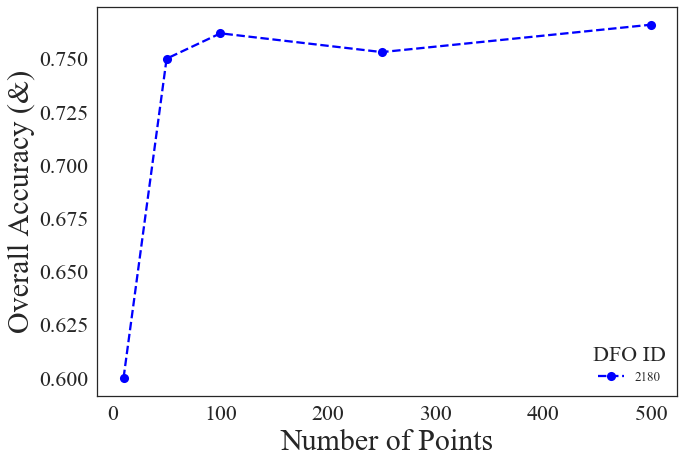

In [59]:
x = 10, 50, 100, 250, 500
#y1 = df_2045['overall_accuracy'].values
y2 = df_2180['overall_accuracy'].values
#y3 = df_2143['overall_accuracy'].values
plt.xticks(np.arange(0, 600, step=100))

#plt.plot(x, y1,color='darkred',marker='o', linestyle='--', label='2045')
plt.plot(x, y2,color='blue', marker='o', linestyle='--',label='2180')
#plt.plot(x, y3, color='green', marker='o', linestyle='--',label='2143')

plt.legend(title="DFO ID")
plt.xlabel('Number of Points', fontsize=30)
plt.ylabel('Overall Accuracy (&)', fontsize=30)


#%cd /Users/ckuhn/Documents/DFO_Accuracy/figures
#plt.savefig('point_test_overallacc.png', dpi = 300)

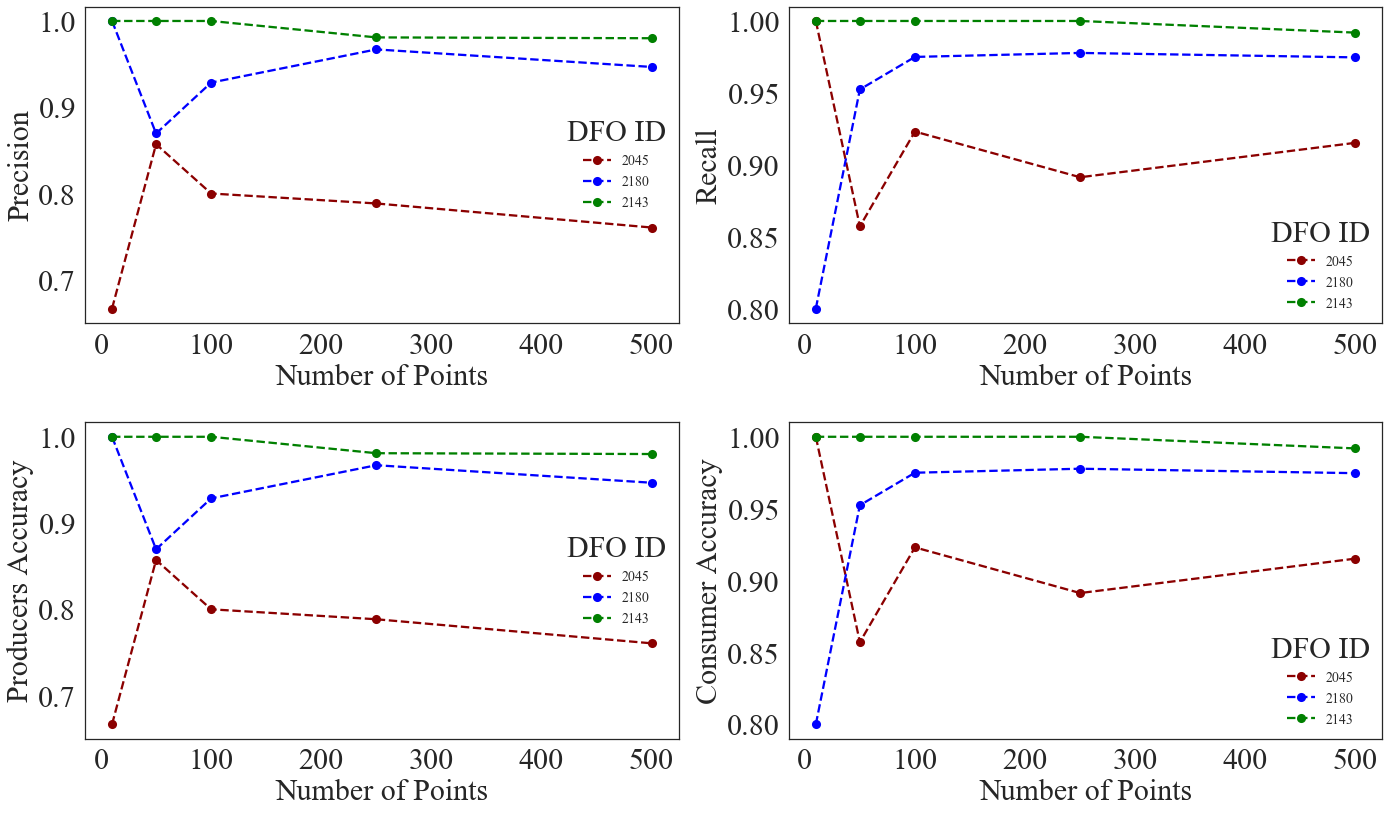

In [237]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-talk'])
    plt.rc("font", family="Times New Roman", size = 30)
    plt.rc('xtick', labelsize=30) 
    plt.rc('ytick', labelsize=30) 
    plt.rc({'axes.titlesize': 'large'})
set_style()  



plt.figure(figsize=(20, 12))

plt.subplot(221) 

x = 10, 50, 100, 250, 500
y1 = df_2045['precision'].values
y2 = df_2180['precision'].values
y3 = df_2143['precision'].values

plt.plot(x, y1,color='darkred',marker='o', linestyle='--', label='2045')
plt.plot(x, y2,color='blue', marker='o', linestyle='--',label='2180')
plt.plot(x, y3, color='green', marker='o', linestyle='--',label='2143')

#plt.axvline(x=100, color= 'grey')
plt.legend(title="DFO ID", fontsize=14)
plt.xlabel('Number of Points',fontsize=30)
plt.ylabel('Precision',fontsize=30)
#%cd /Users/ckuhn/Documents/DFO_Accuracy/figures
#plt.savefig('point_test_precision.png', dpi = 300)


plt.subplot(222) 
x = 10, 50, 100, 250, 500
y1 = df_2045['recall'].values
y2 = df_2180['recall'].values
y3 = df_2143['recall'].values

plt.plot(x, y1,color='darkred',marker='o', linestyle='--', label='2045')
plt.plot(x, y2,color='blue', marker='o', linestyle='--',label='2180')
plt.plot(x, y3, color='green', marker='o', linestyle='--',label='2143')

plt.legend(title="DFO ID", fontsize=14)
plt.xlabel('Number of Points', fontsize=30)
plt.ylabel('Recall',fontsize=30)

#%cd /Users/ckuhn/Documents/DFO_Accuracy/figures
#plt.savefig('point_test_recall.png', dpi = 300)


plt.subplot(223) 

x = 10, 50, 100, 250, 500
y1 = df_2045['omission'].values
y2 = df_2180['omission'].values
y3 = df_2143['omission'].values
plt.xticks(np.arange(0, 600, step=100))

plt.plot(x, y1,color='darkred',marker='o', linestyle='--', label='2045')
plt.plot(x, y2,color='blue', marker='o', linestyle='--',label='2180')
plt.plot(x, y3, color='green', marker='o', linestyle='--',label='2143')

plt.legend(title="DFO ID", fontsize=14)
plt.xlabel('Number of Points',  fontsize=30)
plt.ylabel('Producers Accuracy', fontsize=30)


#%cd /Users/ckuhn/Documents/DFO_Accuracy/figures
#plt.savefig('point_test_omission.png', dpi = 300)

plt.subplot(224) # COLUMBIA L8 

x = 10, 50, 100, 250, 500
y1 = df_2045['comission'].values
y2 = df_2180['comission'].values
y3 = df_2143['comission'].values
plt.xticks(np.arange(0, 600, step=100))

plt.plot(x, y1,color='darkred',marker='o', linestyle='--', label='2045')
plt.plot(x, y2,color='blue', marker='o', linestyle='--',label='2180')
plt.plot(x, y3, color='green', marker='o', linestyle='--',label='2143')

plt.legend(title="DFO ID", fontsize=14)
plt.xlabel('Number of Points', fontsize=30)
plt.ylabel('Consumer Accuracy',  fontsize=30)

plt.tight_layout()

#%cd /Users/ckuhn/Documents/DFO_Accuracy/figures
#plt.savefig('point_test_comission.png', dpi = 300)